## Corey Solitaire
### advancecd_dataframes
#### 8/14/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12, 6))
from pydataset import data

In [ ]:
"""
Test for SQL import and env.py
"""
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

In [ ]:
# Big Test, that Passed...

pd.read_sql("""
SELECT CONCAT(employees.first_name, " ", employees.last_name) AS "Employee Name", departments.dept_name AS "Department Name", manager_name AS "Manager Name"
FROM employees
    JOIN dept_emp
        ON employees.emp_no = dept_emp.emp_no
    JOIN departments
        ON dept_emp.dept_no = departments.dept_no
    JOIN dept_manager
        ON dept_manager.dept_no = dept_emp.dept_no
-- The following subquery is a table that connects the current department manager name to their emp_no and its alias is manager_names

    JOIN(
        SELECT employees.emp_no, CONCAT(employees.first_name, " ", employees.last_name) AS manager_name
            FROM employees
                JOIN dept_manager
                    ON employees.emp_no = dept_manager.emp_no AND dept_manager.to_date > curdate()
    ) AS manager_names
WHERE dept_manager.to_date > curdate()
    AND dept_emp.to_date > curdate()
    AND dept_manager.emp_no = manager_names.emp_no;""", url)

# Advanced Dataframes Exercises

In [ ]:
"""
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset
"""

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [ ]:
mpg_df = data('mpg')
data('mpg', show_doc=True)

In [ ]:
# On average, which manufacturer has the best miles per gallon

mpg_df.head()

In [ ]:
mpg_df = mpg_df.assign(avg_mpg = (mpg_df.cty + mpg_df.hwy) /2)
mpg_df

In [ ]:
mpg_df.sort_values(by=['avg_mpg', 'manufacturer'], ascending = False)


In [ ]:
# How many different manufacturers are there?

len(mpg_df.groupby('manufacturer'))


In [ ]:
# How many different models are there?

"""
The first step to verify count (38 Rows)
"""
#mpg_df.groupby('model').describe()

"""
Apply len function to return an answer
"""
len(mpg_df.groupby('model').describe())

In [ ]:
# Do automatic or manual cars have better miles per gallon?
mpg_df.head()

mpg_df.sort_values(by=['avg_mpg', 'trans'], ascending = False)

### 2. Joining and Merging

In [ ]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

In [ ]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

In [ ]:
# Copy the users and roles dataframes from the examples above. What do you think a right join would look like?  

"""
pd.merge(left, right, how="type_of_join", left_on="key from the left", right_on="key from the right df")
Left = NAME of 1st Dataframe
Right = NAME of 2nd Dataframe
LEFT JOIN means keep all the USERS even if they don't have a role...
"""

users_with_roles = pd.merge(users, roles, left_on='role_id', right_on='id', how='left')
users_with_roles


In [ ]:
# An outer join? (100 % Inclusive of Null Values)

users_with_roles_all_null = pd.merge(users, roles, left_on = 'role_id', right_on = 'id' , how = 'outer')
users_with_roles_all_null

In [ ]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?

users_test = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
})
users_test

In [ ]:
roles_test = pd.DataFrame({
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles_test

In [ ]:
# The merging...
no_foreign_key = pd.merge(users_test, roles_test, left_on = 'name', right_on = 'name' , how = 'outer')
no_foreign_key

### 3. Getting data from SQL databases

In [2]:
# Create a function named get_db_url. It should accept a 
# username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')


In [ ]:
# Use your function to obtain a connection to the employees database.

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

In [ ]:
# Once you have successfully run a query:
#  - Intentionally make a typo in the database url. What kind of error message do you see?
 """
 No it took me too long to get the function right.  It will just tell me that the database I am looking
 for does not exist.  Ryan showed up.
 """

In [ ]:
#   -Intentionally make an error in your SQL query. What does the error message look like?

pd.read_sql('SELECT genders FROM employees LIMIT 5 OFFSET 50', url)

In [ ]:
# Read the employees and titles tables into two separate dataframes

employees_df = pd.DataFrame(pd.read_sql('SELECT * FROM employees', url))
employees_df.head()

In [4]:
titles_df = pd.DataFrame(pd.read_sql('SELECT * FROM titles', url))
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


title
Assistant Engineer    AxesSubplot(0.125,0.125;0.775x0.755)
Engineer              AxesSubplot(0.125,0.125;0.775x0.755)
Manager               AxesSubplot(0.125,0.125;0.775x0.755)
Senior Engineer       AxesSubplot(0.125,0.125;0.775x0.755)
Senior Staff          AxesSubplot(0.125,0.125;0.775x0.755)
Staff                 AxesSubplot(0.125,0.125;0.775x0.755)
Technique Leader      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

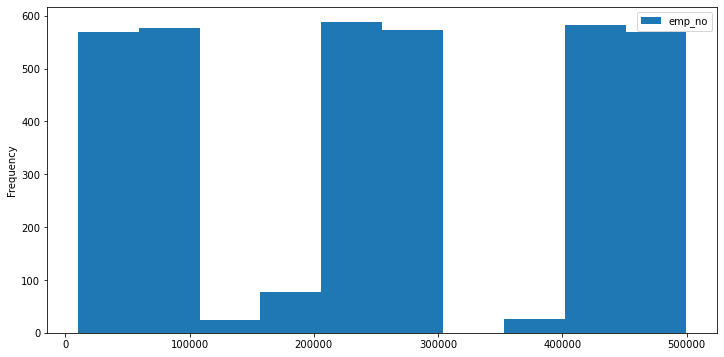

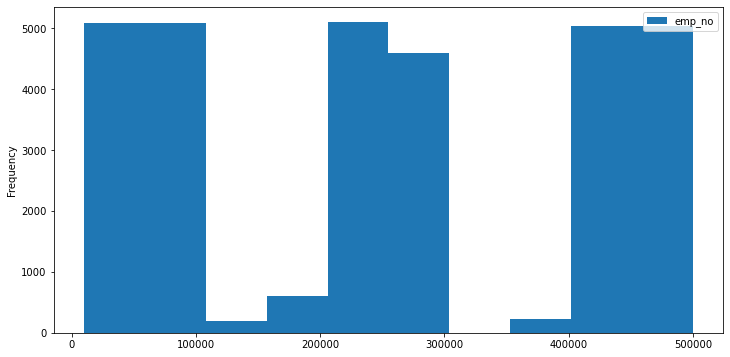

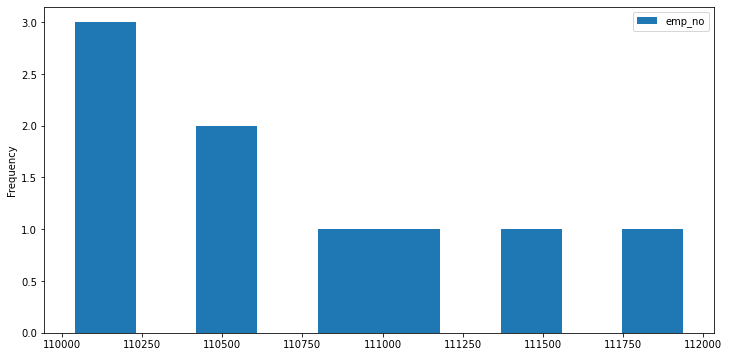

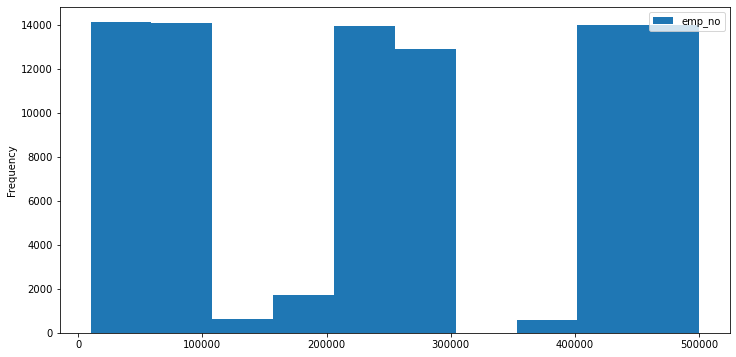

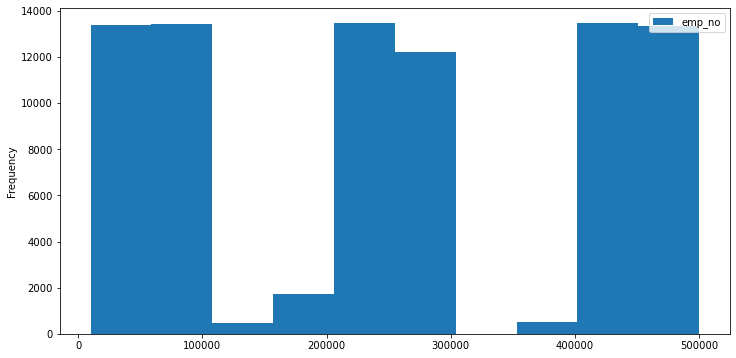

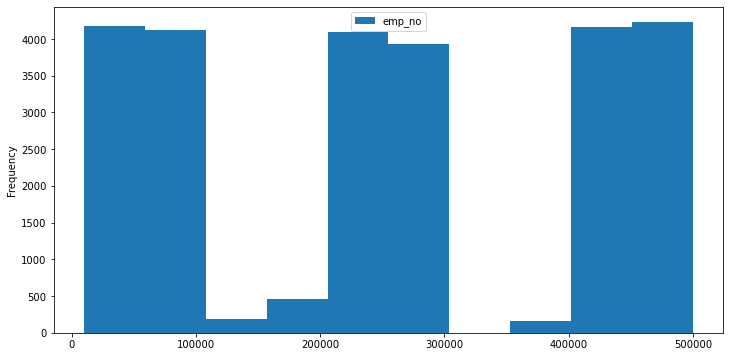

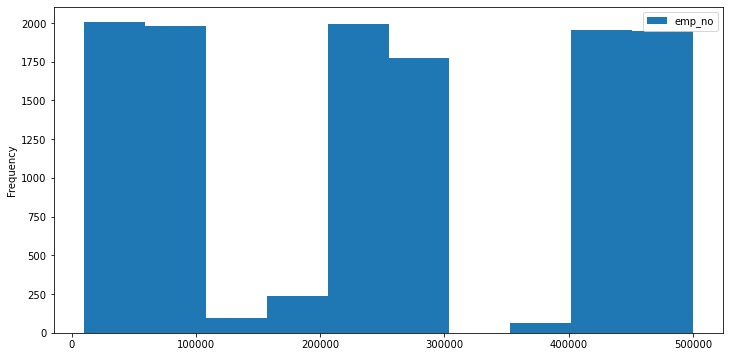

In [44]:
# Visualize the number of employees with each title.
"""
First we need to find current employees
"""

current_employees = titles_df[titles_df.to_date == titles_df.to_date.max()]

"""
Next we need to group employees by titles
"""
current_employees.groupby('title')

"""
Now lets take a look at it
"""
current_employees.groupby('title').plot.hist()

In [ ]:
# Join the employees and titles dataframes together.


In [ ]:
# Visualize how frequently employees change titles.


In [ ]:
# For each title, find the hire date of the employee that was hired most recently with that title.


In [ ]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
#  (Hint: this will involve a combination of SQL and python/pandas code)


### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [ ]:
# What is the total price for each order?


In [ ]:
# What are the most popular 3 items?


In [ ]:
# Which item has produced the most revenue?
